In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import file

df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,min_salary,max_salary,avg_salary,job_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$80K - $123K (Glassdoor est.),Import and analysis of data to estimate target...,3.2,PartnerRe,"Charlotte, NC",1001 to 5000 Employees,--,Company - Public,Insurance Carriers,...,80,123,101.5,Charlotte,-1,0,0,0,0,0
1,Data Scientist I,$80K - $92K (Employer est.),Expert knowledge of core data science concepts...,2.7,Vibrant Emotional Health,Remote,201 to 500 Employees,--,Nonprofit Organization,Civic & Social Services,...,80,92,86.0,Remote,-1,0,0,0,0,0
2,Data Scientist,$110K - $140K (Employer est.),Utilize machine learning tools to find pattern...,3.6,BrandSafway,"Atlanta, GA",10000+ Employees,2017,Company - Private,Construction,...,110,140,125.0,Atlanta,3,0,0,0,0,0
3,Data Scientist 1,$82K - $127K (Glassdoor est.),The Data Sciences & Machine Intelligence group...,4.2,Pacific Northwest National Laboratory,"Richland, WA",5001 to 10000 Employees,1965,Company - Private,Energy & Utilities,...,82,127,104.5,Richland,55,0,0,0,0,0
4,Data Scientist,$60.00 - $70.00 Per Hour (Employer est.),Provide SME guidance for data science teams on...,-1.0,Ideal Source Inc,"Charlotte, NC",-1,-1,-1,-1,...,60,70,65.0,Charlotte,-1,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          623 non-null    object 
 1   Salary Estimate    623 non-null    object 
 2   Job Description    623 non-null    object 
 3   Rating             623 non-null    float64
 4   Company Name       623 non-null    object 
 5   Location           623 non-null    object 
 6   Size               623 non-null    object 
 7   Founded            623 non-null    object 
 8   Type of ownership  623 non-null    object 
 9   Industry           623 non-null    object 
 10  Sector             623 non-null    object 
 11  Revenue            623 non-null    object 
 12  hourly             623 non-null    int64  
 13  employer_provided  623 non-null    int64  
 14  min_salary         623 non-null    int64  
 15  max_salary         623 non-null    int64  
 16  avg_salary         623 non

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [6]:
df['job_simp'].value_counts()

job_simp
data scientist    367
na                139
mle                42
analyst            35
manager            24
director           13
data engineer       3
Name: count, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

seniority
na        408
senior    214
jr          1
Name: count, dtype: int64

In [8]:
df.job_state.value_counts()

job_state
San Francisco    39
Remote           38
Seattle          35
San Jose         15
United States    15
                 ..
Westerville       1
Riverwoods        1
Corona            1
Stamford          1
Downers Grove     1
Name: count, Length: 237, dtype: int64

In [9]:
df['Job Description']

0      Import and analysis of data to estimate target...
1      Expert knowledge of core data science concepts...
2      Utilize machine learning tools to find pattern...
3      The Data Sciences & Machine Intelligence group...
4      Provide SME guidance for data science teams on...
                             ...                        
618    Lead engagement and revenue initiatives includ...
619    Develop and maintain strategic partnerships wi...
620    SQL for data management and analysis. 5+ years...
621    Collaborate with both our team and cross-funct...
622    Option 1: Bachelors degree in Statistics, Econ...
Name: Job Description, Length: 623, dtype: object

In [10]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      187
1      158
2      206
3      212
4      225
      ... 
618    243
619    230
620    222
621    213
622    236
Name: desc_len, Length: 623, dtype: int64

In [11]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [12]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
4,1,120,140
8,1,160,200
31,1,142,142
33,1,78,132
56,1,88,132
67,1,104,120
71,1,74,106
94,1,66,118
126,1,118,192
158,1,118,192


<Axes: >

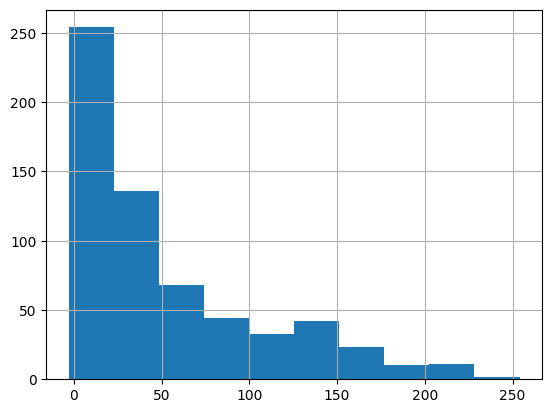

In [13]:
df.age.hist()

<Axes: >

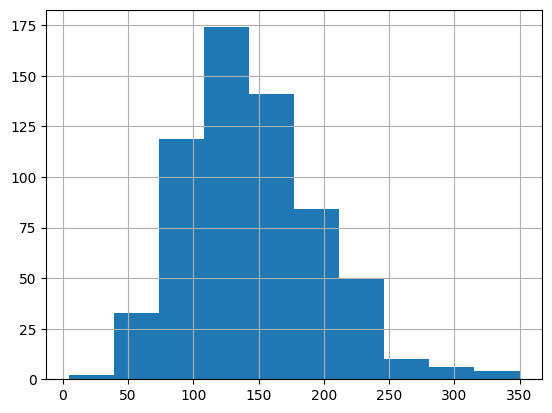

In [14]:
df.avg_salary.hist()

<Axes: >

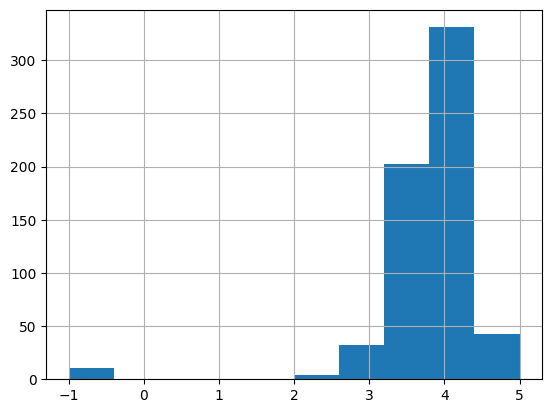

In [15]:
df.Rating.hist()

<Axes: >

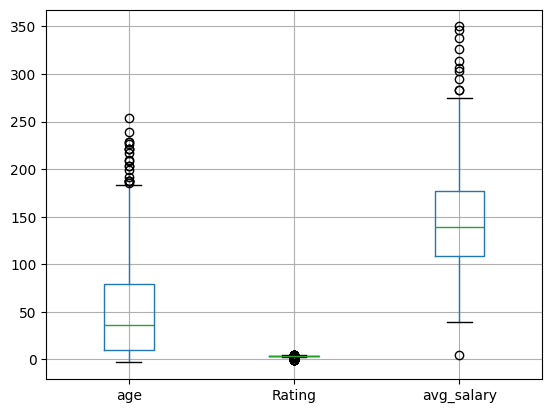

In [16]:
df.boxplot(column=['age','Rating','avg_salary'])

In [17]:
corr = df[['age','avg_salary','Rating']].corr()
corr

,age,avg_salary,Rating
age,1.000000,-0.270867,0.160102
avg_salary,-0.270867,1.000000,0.071244
Rating,0.160102,0.071244,1.000000


<Axes: >

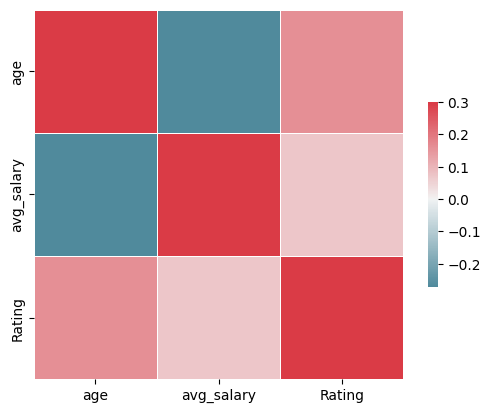

In [18]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,vmax=.3, center=0, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [20]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector','Company Name', 'Revenue', 'job_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 243


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


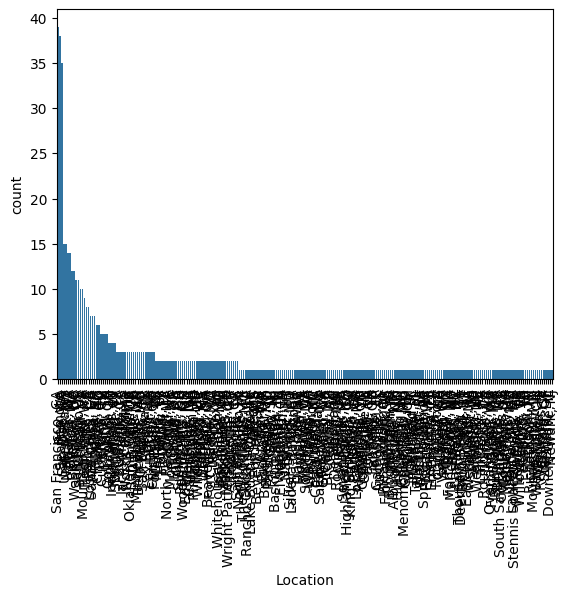

graph for Size: total = 9


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


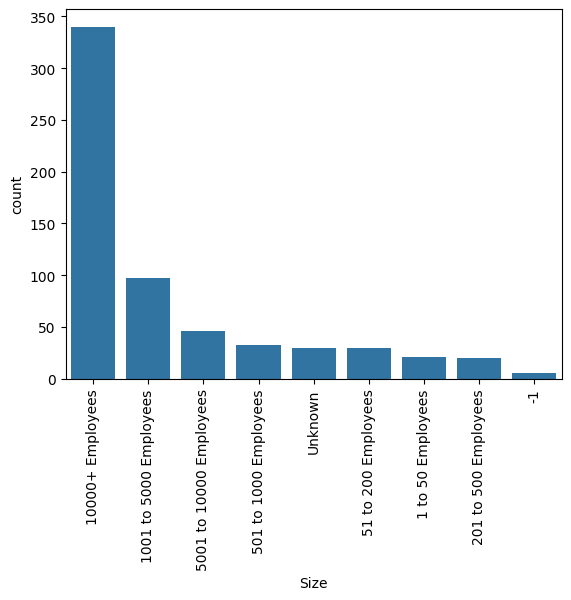

graph for Type of ownership: total = 13


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


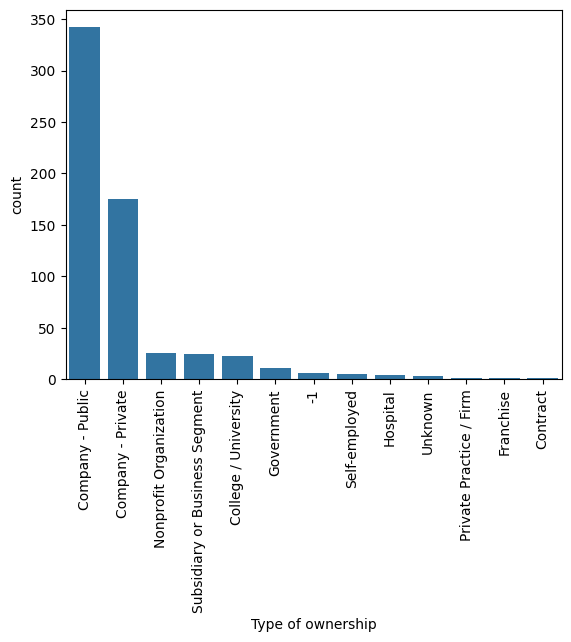

graph for Industry: total = 65


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


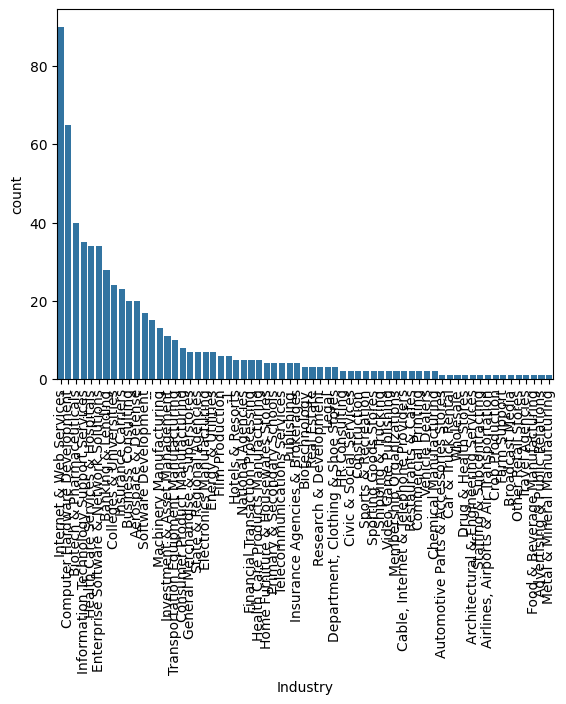

graph for Sector: total = 26


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


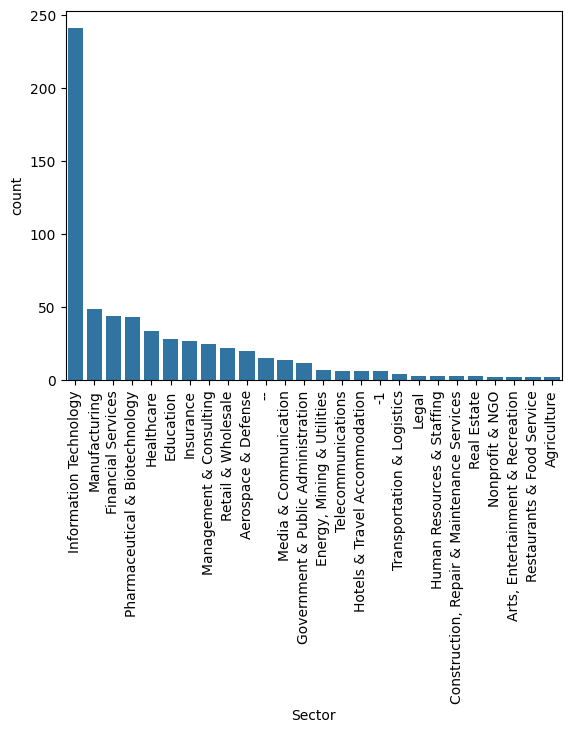

graph for Company Name: total = 420


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


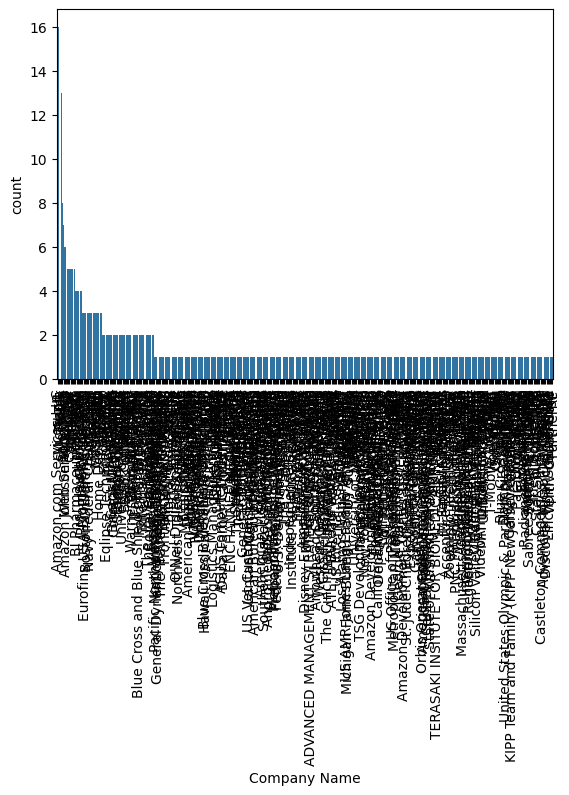

graph for Revenue: total = 11


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


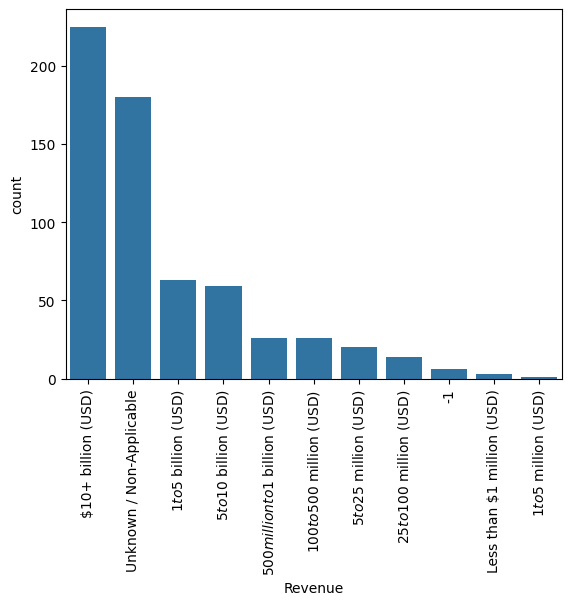

graph for job_state: total = 237


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


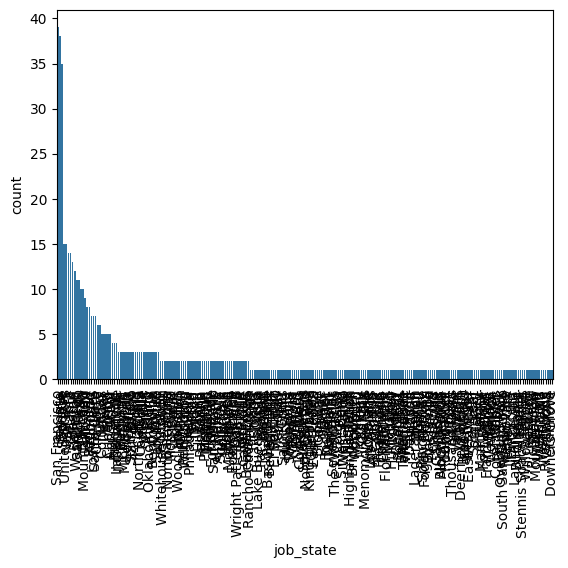

graph for python_yn: total = 2


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


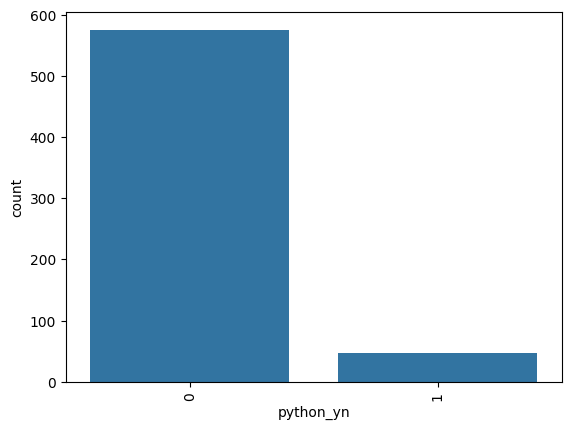

graph for R_yn: total = 1


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


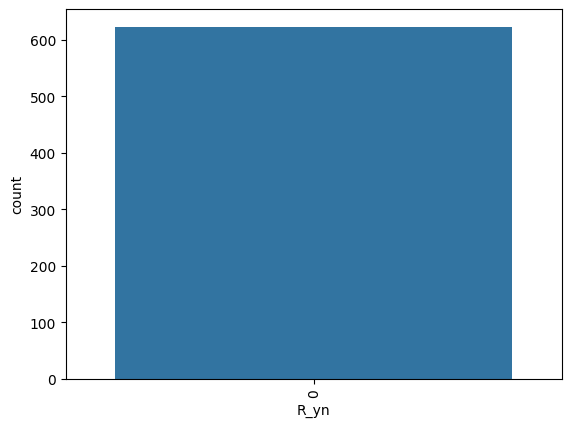

graph for spark: total = 2


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


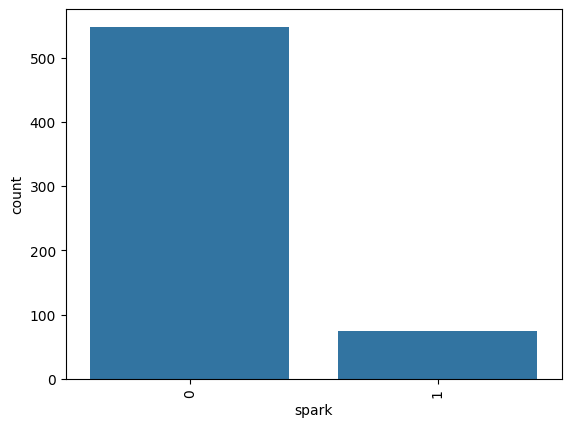

graph for aws: total = 2


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


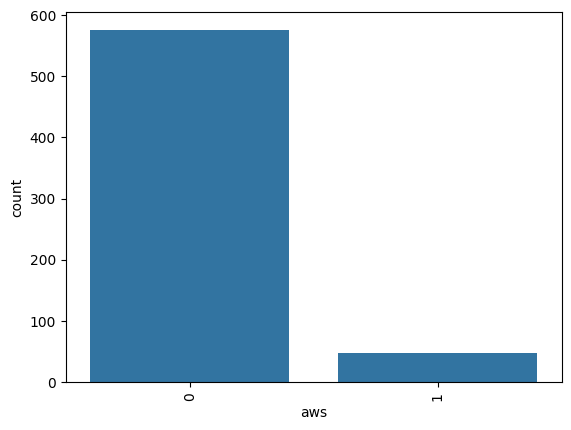

graph for excel: total = 2


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


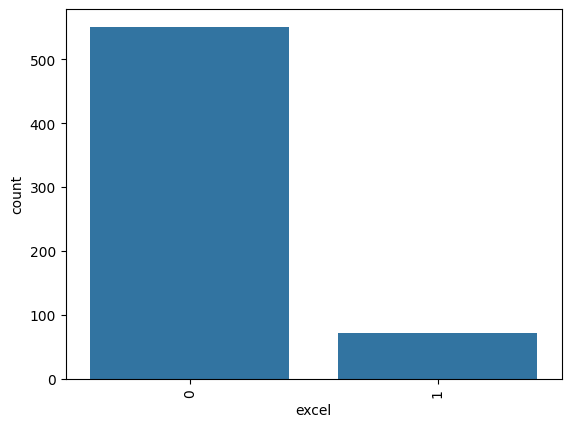

graph for job_simp: total = 7


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


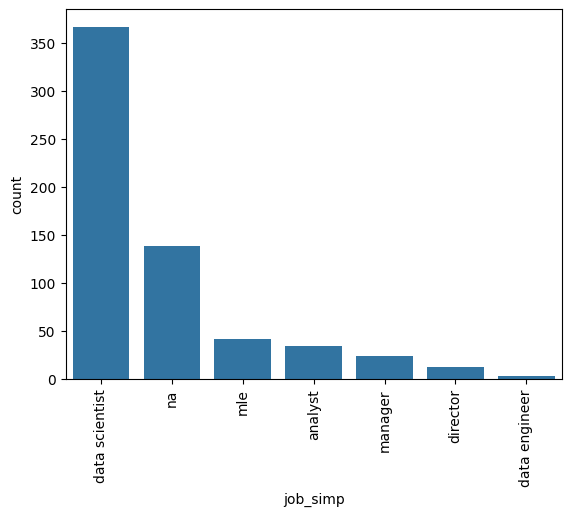

graph for seniority: total = 3


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


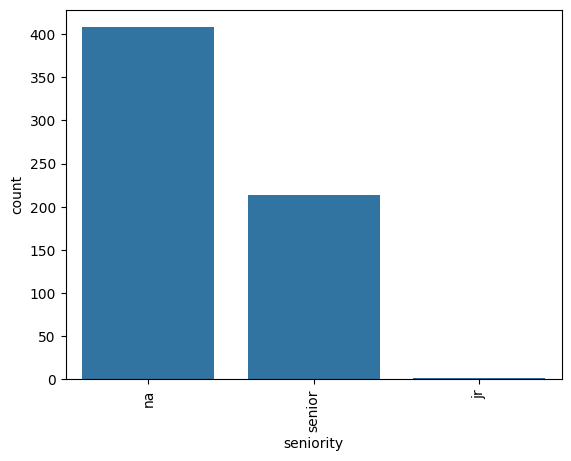

In [21]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\3627710444.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


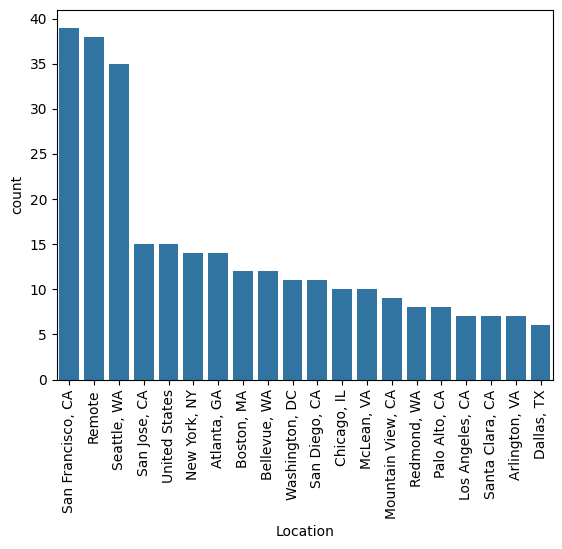

graph for Company Name: total = 20


C:\Users\pravi\AppData\Local\Temp\ipykernel_102940\3627710444.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


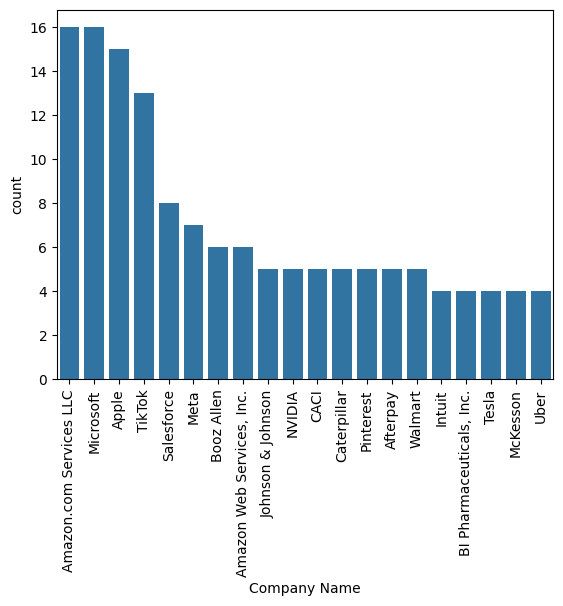

In [22]:
for i in df_cat[['Location','Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [23]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,109.928571
data engineer,187.833333
data scientist,141.792916
director,195.538462
manager,160.500000
mle,186.773810
na,143.194245


In [24]:

pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          68.500000
               na          89.200000
               senior     120.291667
data engineer  na         206.250000
               senior     151.000000
data scientist na         131.226457
               senior     158.156250
director       na         195.538462
manager        na         160.000000
               senior     163.000000
mle            na         186.426471
               senior     188.250000
na             na         130.452830
               senior     184.121212

In [25]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state            job_simp                  
Wright Patterson AFB na                    92.0
Woodland Hills       data scientist        60.0
                     analyst              132.5
Woodburn             data scientist       102.5
Wilmington           data scientist       132.5
...                                         ...
Alpharetta           na                   141.5
Allenton             manager              122.5
Alexandria           data scientist       158.5
Albuquerque          na                     4.5
Alameda              data scientist       216.0

[340 rows x 1 columns]

In [26]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state            job_simp                  
Wright Patterson AFB na                       2
Woodland Hills       data scientist           1
                     analyst                  1
Woodburn             data scientist           1
Wilmington           data scientist           2
...                                         ...
Alpharetta           na                       1
Allenton             manager                  1
Alexandria           data scientist           1
Albuquerque          na                       1
Alameda              data scientist           1

[340 rows x 1 columns]

In [27]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
San Antonio,248.75
Columbia,247.00
Alameda,216.00
Cupertino,207.50
Fremont,207.50
...,...
Lynchburg,67.50
Costa,61.50
Tallahassee,61.50


In [28]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [29]:
for i in df_pivots.columns:
    try:
        # Pivot table for each column in df_pivots
        pivot = pd.pivot_table(df_pivots, index=i, values='avg_salary', aggfunc='mean')
        # Sort the pivot table by 'avg_salary' in descending order
        sorted_pivot = pivot.sort_values('avg_salary', ascending=False)
        print(f"Pivot table for {i}:")
        print(sorted_pivot)
    except Exception as e:
        print(f"Error processing column {i}: {e}")

Pivot table for Rating:
        avg_salary
Rating            
 4.7    198.000000
 2.5    170.000000
 3.3    167.479167
 3.7    165.872727
 4.6    165.611111
 4.4    164.958333
 2.0    163.000000
 2.8    160.800000
 4.0    154.654412
 3.4    152.435484
 4.3    149.500000
 4.2    148.836364
 3.5    147.303571
 4.1    144.529412
 3.0    143.812500
 3.8    143.241071
 3.6    135.531250
 3.9    132.105769
 4.8    128.500000
-1.0    121.590909
 4.9    121.125000
 5.0    120.700000
 3.2    118.781250
 4.5    118.000000
 2.7    117.875000
 2.3    116.500000
 2.9    114.250000
 3.1    102.550000
 2.6     99.666667
 2.1     92.000000
Pivot table for Industry:
                                         avg_salary
Industry                                           
Advertising & Public Relations           220.000000
Internet & Web Services                  196.172222
Home Furniture & Housewares Stores       188.500000
General Merchandise & Superstores        183.571429
Software Development          

In [30]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),58.0,5.0
$1 to $5 million (USD),NaN,1.0
$10+ billion (USD),213.0,12.0
$100 to $500 million (USD),24.0,2.0
$25 to $100 million (USD),13.0,1.0
$5 to $10 billion (USD),57.0,2.0
$5 to $25 million (USD),19.0,1.0
$500 million to $1 billion (USD),25.0,1.0
-1,6.0,NaN


In [31]:
#Import libraries
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [36]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pravi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

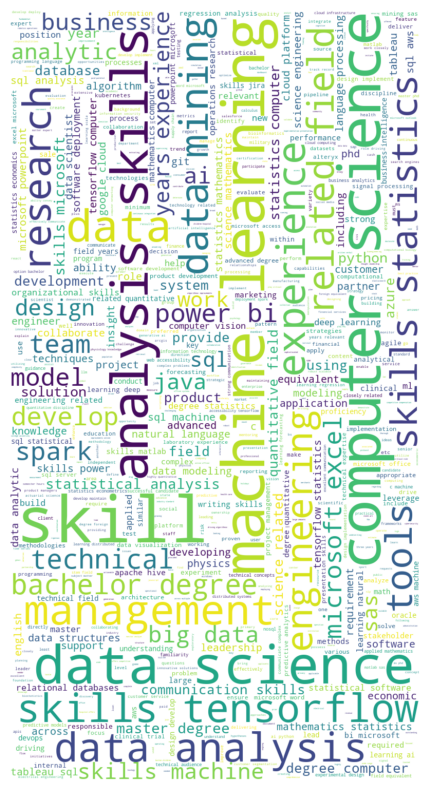

In [38]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()